#### type, duration

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./netflix_titles.csv')
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### type

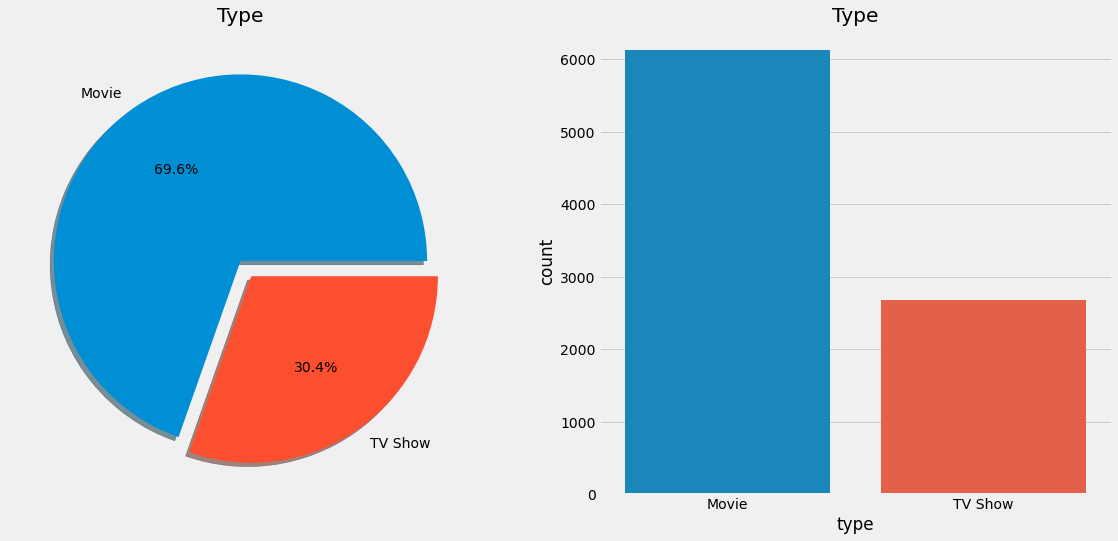

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

f, ax = plt.subplots(1, 2, figsize = (18,8))

data['type'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)

ax[0].set_title('Type')
ax[0].set_ylabel('')

sns.countplot('type', data = data, ax = ax[1])
ax[1].set_title('Type')

plt.show()

In [4]:
data.groupby('type').size()

type
Movie      6131
TV Show    2676
dtype: int64

### duration

In [6]:
data['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [7]:
# duration dtype: object -> string 변환
data['duration'] = data['duration'].astype('string')
data['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: string

In [8]:
data[data.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,<NA>,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,<NA>,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,<NA>,Movies,The comic puts his trademark hilarious/thought...


In [10]:
# duration에 있는 문자 제거, 숫자만 남김
# float 형 변환

#import re

#data['duration'] = re.sub('[^\b]', ' ', data['duration'])
#data['duration']

data['duration'] = data['duration'].replace(to_replace='min', value='', regex=True)
data['duration'] = data['duration'].replace(to_replace='Seasons', value='', regex=True)
data['duration'] = data['duration'].replace(to_replace='Season', value='', regex=True)
data['duration'] = data['duration'].astype('float')
data['duration']

0        90.0
1         2.0
2         1.0
3         1.0
4         2.0
        ...  
8802    158.0
8803      2.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 8807, dtype: float64

In [11]:
data[data.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
# movie duration max 값 확인
data[data['type']=='Movie'].duration
data[data['type']=='Movie'].duration.max()

312.0

In [13]:
# tv show max 값 확인
data[data['type']=='TV Show'].duration
data[data['type']=='TV Show'].duration.max()

17.0

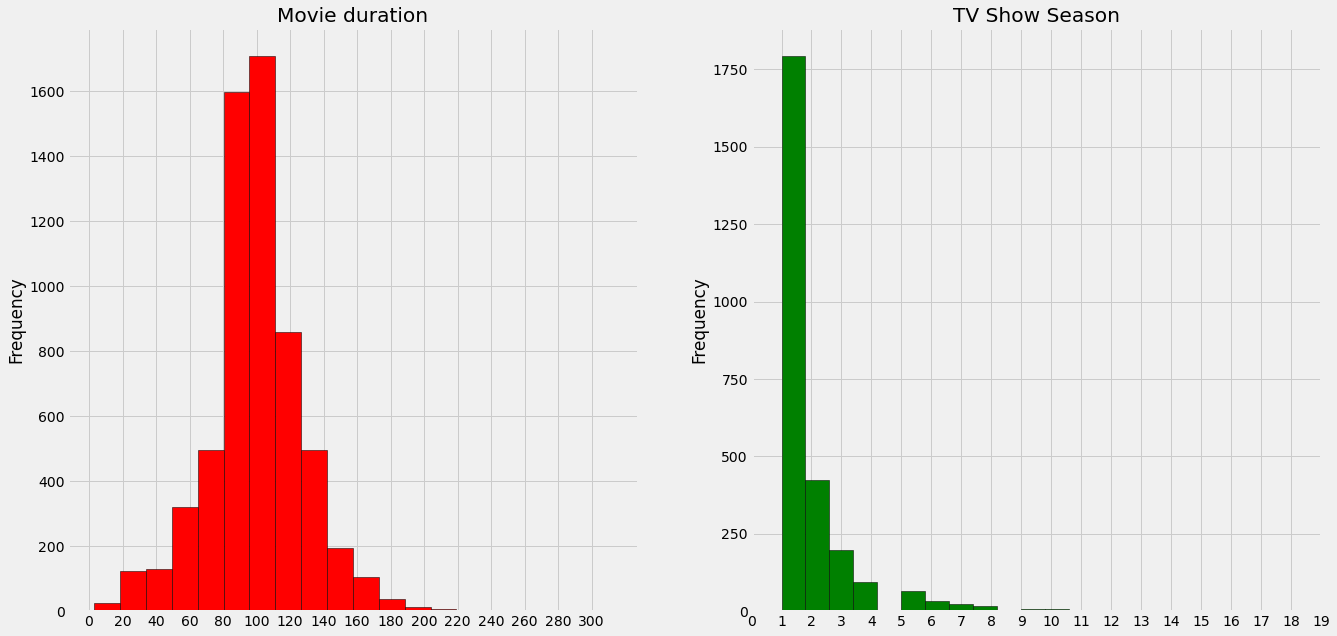

In [14]:
f, ax = plt.subplots(1, 2, figsize = (20,10))

x1 = list(range(0, 320, 20))

data[data['type']=='Movie'].duration.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='r')
ax[0].set_title('Movie duration')
ax[0].set_xticks(x1)

x2 = list(range(0, 20))

data[data['type']=='TV Show'].duration.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='g')
ax[1].set_title('TV Show Season')
ax[1].set_xticks(x2)

plt.show()

In [15]:
# 영화 최장시간 인덱스
data.duration.idxmax()

4253

In [16]:
data[4253:4254]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312.0,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [17]:
# 가장 짧은 영화
data[data['type']=='Movie'].duration.idxmin()
data[3777:3778]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y,3.0,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [18]:
# tv show 최다 시즌 인덱스
data[data['type']=='TV Show'].duration.idxmax()

548

In [19]:
data[548:549]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17.0,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


In [20]:
# 결측치 가진 데이터 행 확인하기
data[data.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
